(8402, 16)
(8402, 16)
                snout.x     snout.y      head.x      head.y  body_center.x  \
RESI_frames                                                                  
0            274.829529  228.115784  257.327972  233.984543     201.277847   
1            277.022064  227.345474  260.117645  233.545288     204.173691   
2            280.952118  225.041931  263.441437  233.389511     207.342743   
3            281.132965  228.290802  266.228424  233.779205     210.220871   
4            283.707336  227.881470  268.947449  233.220596     210.600342   
...                 ...         ...         ...         ...            ...   
8397                NaN         NaN  228.063919  174.746964     300.778198   
8398                NaN         NaN  213.355835  175.139618     286.500061   
8399                NaN         NaN  201.431870  178.249039     268.325623   
8400                NaN         NaN  189.785629  178.418564     248.609421   
8401                NaN         NaN  172.4

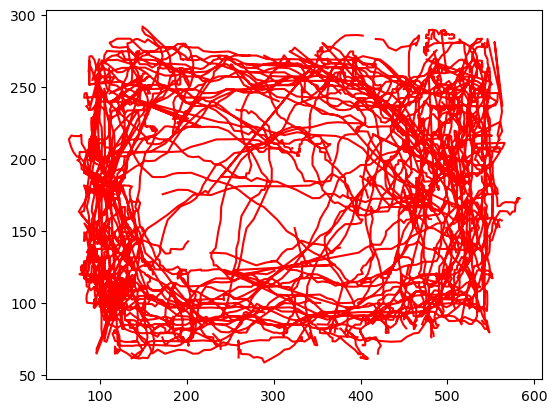

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


data = pd.read_csv("2023-12-13_RI1_145_c.analysis.csv")

interests = ['frame_idx',
             'track', 
             'snout.x', 'snout.y', 
             'head.x', 'head.y', 
             'body_center.x', 'body_center.y', 
             'tail_start.x', 'tail_start.y', 
             'tail_middle.x', 'tail_middle.y', 
             'tail_end.x', 'tail_end.y', 
             'ear_R.x', 'ear_R.y', 
             'ear_L.x', 'ear_L.y']

df = pd.DataFrame(data=data[interests])

# create two diff DataFrames for Residents& Intruder
resi = df[df['track'] == 'Resident']
intr = df[df['track'] == 'Intruder']

# frame_idx column will become the official index and renamed to track_animal, therefore 'track' column will be dropped
resi.set_index('frame_idx', inplace=True)
resi.index.names = ['RESI_frames']
resi = resi.drop(['track'], axis='columns')
intr.set_index('frame_idx', inplace=True)
intr.index.names = ['INTR_frames']
intr = intr.drop(['track'], axis='columns')

# calculate the maximum frame (don't have to be the same for Resident/Intruder -> take max)
max_frame_nb = max([max(list(resi.index.values))+1, max(list(intr.index.values))+1])
full_index = np.arange(0, max_frame_nb, 1)

# fill in missing frames with NaN
resi = resi.reindex(full_index)
intr = intr.reindex(full_index)

# Wherever are missing values, fill in NaN
resi = resi.fillna(math.nan)
intr = intr.fillna(math.nan)

print(resi.shape)
print(intr.shape)

print(resi)
plt.plot(resi['head.x'], resi['head.y'], color='r')
#plt.plot(intr['head.x'], intr['head.y'], color='b')
plt.show()


In [2]:
# create image from every frame
for i in range(8400):
    resi_x = resi.loc[i, [col for col in resi.columns if '.x' in col]]
    resi_y = resi.loc[i, [col for col in resi.columns if '.y' in col]]
    plt.scatter(resi_x, resi_y, color='r')

    intr_x = intr.loc[i, [col for col in intr.columns if '.x' in col]]
    intr_y = intr.loc[i, [col for col in intr.columns if '.y' in col]]
    plt.scatter(intr_x, intr_y, color='b')

    plt.xlim([50, 600])
    plt.ylim([50, 300])
    plt.savefig(f'pics\\{i}.png')
    plt.clf()
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>